In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
import os

def norm_vector(n_, v_):
    p = n_ - np.dot(n_, v_) * v_
    return p

def angle_vector(vector1, vector2):
    dot_product = np.dot(vector1, vector2)
    magnitude1 = np.linalg.norm(vector1)
    magnitude2 = np.linalg.norm(vector2)
    angle = np.arccos(dot_product / (magnitude1 * magnitude2))
    angle_degrees = np.degrees(angle)
    return angle, angle_degrees

def proj_coord(vector, r):
     #* Norm vector projecting on the viewpoint axis
    norm_111 = norm_vector(vector, np.array([0,0,1]))
    #* Angle between the norm vector and the viewpoint axis
    rho, _ = angle_vector(vector, np.array([0,0,1]))
    d = r*np.tan(rho/2)
    unit_len = np.sqrt(d**2/np.sum(norm_111**2))
    x_len, y_len = norm_111[:2]*unit_len
    
    return x_len, y_len

西瓜肚

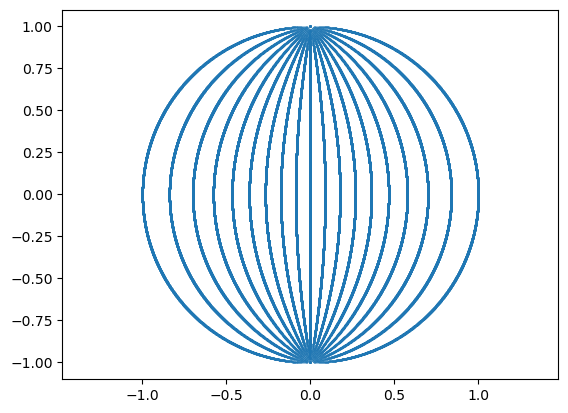

In [5]:
coord_list = []
r = 1
for theta in np.linspace(-90,90,19):
    for y in np.linspace(-1,1,1000):
        theta_ = np.deg2rad(theta)
        x1 = np.sqrt((1-y**2)/(1+np.tan(theta_)**2))
        x2 = -x1
        z1 = np.tan(theta_)*x1
        z2 = np.tan(theta_)*x2
        
        x_proj1, y_proj1 = proj_coord(np.array([x1,y,z1]), r)
        x_proj2, y_proj2 = proj_coord(np.array([x2,y,z2]), r)
        
        coord_list.append([x_proj1,y_proj1])
        coord_list.append([x_proj2,y_proj2])

valid_coord = np.array(coord_list)[np.where(np.linalg.norm(np.array(coord_list), axis=1) <= 1)[0]]
plt.scatter(np.array(valid_coord)[:,0], np.array(valid_coord)[:,1], s=0.1)
plt.axis('equal')

plt.show()

Latitude

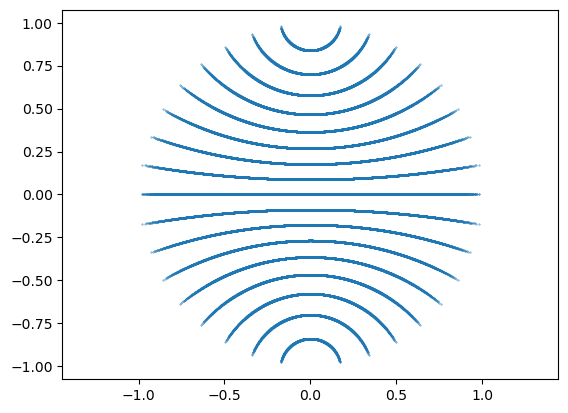

In [4]:
r = 1
coord_list = []

for theta in np.linspace(10,90,9):
    for x in np.linspace(-1,1,10000):
        y = np.cos(np.deg2rad(theta))
        z_ = 1 - x**2 - y**2

        if z_ < 0:
            continue
        z = np.sqrt(z_)
        
        x_proj, y_proj = proj_coord(np.array([x,y,z]), r)
        coord_list.append([x_proj,y_proj])

for theta in np.linspace(10,90,9):
    for x in np.linspace(-1,1,10000):
        y = -np.cos(np.deg2rad(theta))
        z_ = 1 - x**2 - y**2

        if z_ < 0:
            continue
        z = np.sqrt(z_)
        
        x_proj, y_proj = proj_coord(np.array([x,y,z]), r)
        coord_list.append([x_proj,y_proj])
        
valid_coord = np.array(coord_list)[np.where(np.linalg.norm(np.array(coord_list), axis=1) <= 1)[0]]
plt.scatter(np.array(valid_coord)[:,0], np.array(valid_coord)[:,1], s=0.1)
plt.axis('equal')

plt.show()

Prepare vector bufffffer

In [ ]:
def rotate(x, y, z, vector):
    rx = np.array([[1, 0, 0], [0, np.cos(x), -np.sin(x)], [0, np.sin(x), np.cos(x)]])
    ry = np.array([[np.cos(y), 0, np.sin(y)], [0, 1, 0], [-np.sin(y), 0, np.cos(y)]])
    rz = np.array([[np.cos(z), -np.sin(z), 0], [np.sin(z), np.cos(z), 0], [0, 0, 1]])
    vector_ = np.dot(rz, np.dot(ry, np.dot(rx, vector)))
    
    return vector_

vector_buffer_1 = np.array([
    [0,0,1],
    [1,0,2],
    [1,0,1],
    [2,0,1],
    [1,0,0],
    [2,-1,2],
    [2,-1,1],
    [2,-1,0],
    [1,-1,2],
    [1,-1,1],
    [2,-2,1],
    [1,-1,0],
    [1,-2,2],
    [1,-2,1],
    [1,-2,0],
    [1,1,3],
    [2,2,3],
    
])

vector_buffer_2 = np.round(rotate(0, 0, math.pi/2, vector_buffer_1.T).T, 1)
vector_buffer_3 = np.round(rotate(0, 0, math.pi/2, vector_buffer_2.T).T, 1)
vector_buffer_4 = np.round(rotate(0, 0, math.pi/2, vector_buffer_3.T).T, 1)

vector_buffer_z = np.concatenate((vector_buffer_1, vector_buffer_2, vector_buffer_3, vector_buffer_4), axis=0)
vector_buffer_y1 = np.round(rotate(0, math.pi/2, 0, vector_buffer_z.T).T, 1)
vector_buffer_y2 = np.round(rotate(0, math.pi/2, 0, vector_buffer_y1.T).T, 1)
vector_buffer_y3 = np.round(rotate(0, math.pi/2, 0, vector_buffer_y2.T).T, 1)
vector_buffer_y4 = np.round(rotate(0, math.pi/2, 0, vector_buffer_y3.T).T, 1)

vector_buffer_x1 = np.round(rotate(math.pi/2, 0, 0, vector_buffer_z.T).T, 1)
vector_buffer_x2 = np.round(rotate(math.pi/2, 0, 0, vector_buffer_x1.T).T, 1)
vector_buffer_x3 = np.round(rotate(math.pi/2, 0, 0, vector_buffer_x2.T).T, 1)
vector_buffer_x4 = np.round(rotate(math.pi/2, 0, 0, vector_buffer_x3.T).T, 1)

vector_buffer_raw = np.unique(
    np.concatenate((vector_buffer_z, vector_buffer_y1, 
                    vector_buffer_y2, vector_buffer_y3,
                    vector_buffer_y4, vector_buffer_x1,
                    vector_buffer_x2, vector_buffer_x3,
                    vector_buffer_x4), axis=0),
    axis=0)

Statical projection

Euler angle for reaching target: [ 0.16994321 -0.40170808  0.79245687]
True viewpoint: [0.390991 0.655395 0.646207]


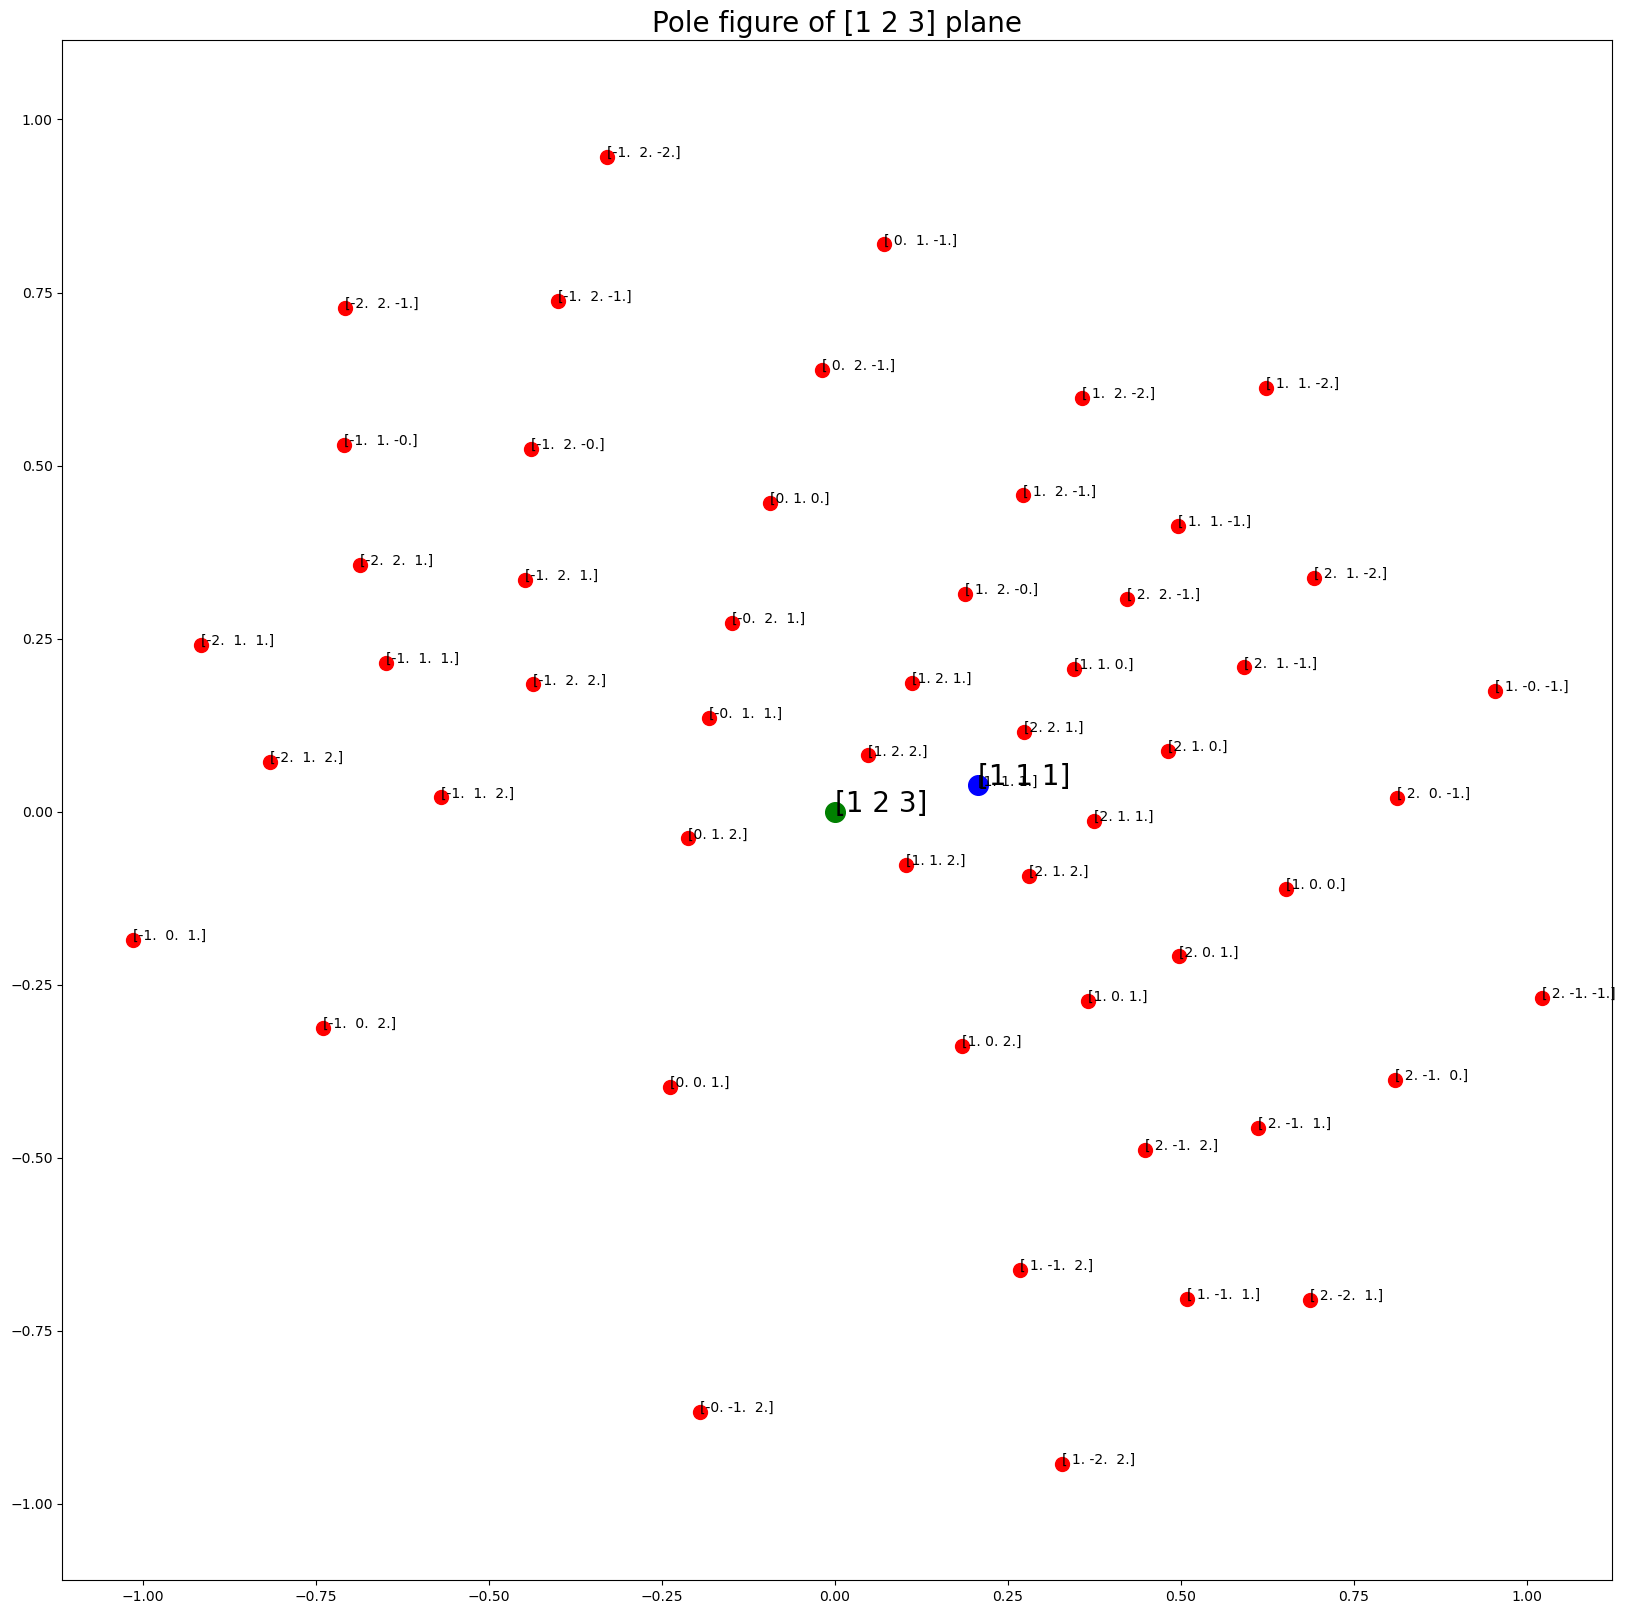

In [ ]:
def norm_vector(n_, v_):
    p = n_ - np.dot(n_, v_) * v_
    return p

def rotate(x, y, z, vector):
    rx = np.array([[1, 0, 0], [0, np.cos(x), -np.sin(x)], [0, np.sin(x), np.cos(x)]])
    ry = np.array([[np.cos(y), 0, np.sin(y)], [0, 1, 0], [-np.sin(y), 0, np.cos(y)]])
    rz = np.array([[np.cos(z), -np.sin(z), 0], [np.sin(z), np.cos(z), 0], [0, 0, 1]])
    vector_ = np.dot(rz, np.dot(ry, np.dot(rx, vector)))
    
    return vector_ 

def angle_vector(vector1, vector2):
    dot_product = np.dot(vector1, vector2)
    magnitude1 = np.linalg.norm(vector1)
    magnitude2 = np.linalg.norm(vector2)
    angle = np.arccos(dot_product / (magnitude1 * magnitude2))
    angle_degrees = np.degrees(angle)
    return angle, angle_degrees

def angle_project_calc(v_plane, v1, v2):
    p1 = norm_vector(v1, v_plane)
    p2 = norm_vector(v2, v_plane)
    angle_project = angle_vector(p1, p2)
    return angle_project

def proj_coord(vector, r):
     #* Norm vector projecting on the viewpoint axis
    norm_111 = norm_vector(vector, np.array([0,0,1]))
    #* Angle between the norm vector and the viewpoint axis
    rho, _ = angle_vector(vector, np.array([0,0,1]))
    d = r*np.tan(rho/2)
    unit_len = np.sqrt(d**2/np.sum(norm_111**2))
    x_len, y_len = norm_111[:2]*unit_len
    
    return x_len, y_len

def rotation_axis(vector1, vector2):
    axis = np.cross(vector1, vector2)
    return axis

def euler_angle_calc(rotate_axis, rotate_degree):
    quaternion = R.from_rotvec(rotate_axis * rotate_degree / np.linalg.norm(rotate_axis))
    quaternion_conj = R.from_rotvec(rotate_axis * -rotate_degree / np.linalg.norm(rotate_axis)) #* Minus rotation for vector buffer
    euler_angles = quaternion.as_euler('zyx',)
    euler_angles_conj = quaternion_conj.as_euler('zyx',)
    
    return euler_angles, euler_angles_conj

r = 1
x_010, y_100, symbol = [], [], []

#* Transfer the coordinates
lattice_vector = np.eye(3)*np.array([7.66, 6.42, 4.22])
vector_buffer_raw = np.load(r'C:\Users\WANGZHI\OneDrive - Kyoto University\proj_lite\crystal_proj\vector_buffer_raw.npy')
# vector_buffer_raw = np.load(r'/Users/wz/Library/CloudStorage/OneDrive-KyotoUniversity/proj_lite/crystal_proj/vector_buffer_raw.npy')

vector_buffer = vector_buffer_raw.copy()
vector_buffer_ = vector_buffer@lattice_vector
vector_buffer_ = vector_buffer_/np.linalg.norm(vector_buffer_, axis=1)[:, None]

viewpoint_axis = np.array([0,0,1]) #* Origin viewpoint axis
viewpoint_axis_ = viewpoint_axis@lattice_vector
viewpoint_axis_ = viewpoint_axis_/np.linalg.norm(viewpoint_axis_)

special_vector = np.array([1,1,1]) #* Special vector for displaying on projection plane
special_vector_ = special_vector@lattice_vector
special_vector_ = special_vector_/np.linalg.norm(special_vector_)

target_vector = np.array([1,2,3]) #* Target for rotating
target_vector_ = target_vector@lattice_vector
target_vector_ = target_vector_/np.linalg.norm(target_vector_)

#! Calculate the euler angle
rotate_axis = rotation_axis(viewpoint_axis_, target_vector_)
rotate_degree = angle_vector(viewpoint_axis_, target_vector_)[0]
euler_angle, euler_angle_conj = euler_angle_calc(rotate_axis, rotate_degree)
print(f'Euler angle for reaching target: {euler_angle_conj}')
# angle_x, angle_y, angle_z = np.deg2rad(
#     np.array([90, 49.744, 30.819])) #* Euler angle
rot = R.from_euler('zyx', euler_angle)
rot_minus = R.from_euler('zyx', euler_angle_conj)
viewpoint_axis_true = rot.apply(viewpoint_axis)
# viewpoint_axis_true = rotate(angle_x, angle_y, angle_z, viewpoint_axis*(lattice_vector/7.66))
# vector_buffer_ = rotate(angle_x, angle_y, angle_z, vector_buffer_.T).T
vector_buffer_ = rot_minus.apply(vector_buffer_)
# special_vector_ = rotate(
#     angle_x, angle_y, angle_z, special_vector*(lattice_vector/7.66))
target_vector_ = rot_minus.apply(target_vector_)
special_vector_ = rot_minus.apply(special_vector_)

for vector, vector_raw in zip(vector_buffer_, vector_buffer):
    x_len, y_len = proj_coord(vector, r)
    
    y_100.append(y_len)
    x_010.append(x_len)
    symbol.append(str(vector_raw))

x_special, y_special = proj_coord(special_vector_, r)
x_target, y_target = proj_coord(target_vector_, r)

pole_list = np.array([x_010, y_100]).T
valid_pole_ind = np.where(np.linalg.norm(pole_list, axis=1) <= 1.1)[0]
valid_pole = pole_list[valid_pole_ind]

fig, ax = plt.subplots(figsize=(20,20))

print(f'True viewpoint: {np.round(viewpoint_axis_true,6)}')
plt.scatter(valid_pole[:,0], valid_pole[:,1], s=100, c='r', marker='o')

plt.scatter(x_special, y_special, s=200, c='b', marker='o')
plt.text(x_special, y_special, str(special_vector), fontsize=20)

plt.scatter(x_target, y_target, s=200, c='green', marker='o')
plt.text(x_target, y_target, str(target_vector), fontsize=20)

plt.axis('equal')
for i in valid_pole_ind:
    plt.text(x_010[i], y_100[i], symbol[i], fontsize=10)
plt.title(f'Pole figure of {str(np.round(target_vector,1))} plane', fontsize=20)
# plt.text(x_010[-1], y_100[-1], symbol[-1])
plt.show()

In [ ]:
def quaternion_represent(rotate_axis, rotate_degree, degrees=False):
    if degrees:
        rotate_degree = np.deg2rad(rotate_degree)
        
    rotate_axis = rotate_axis/np.linalg.norm(rotate_axis)
    w = np.cos(rotate_degree/2)
    x = rotate_axis[0]*np.sin(rotate_degree/2)
    y = rotate_axis[1]*np.sin(rotate_degree/2)
    z = rotate_axis[2]*np.sin(rotate_degree/2)
    
    return np.array([w,x,y,z])

rotate_axis = np.array([0,0,1])
rotate_degree = math.pi/2
qua_ = quaternion_represent(rotate_axis, rotate_degree)
print(qua_)

rot = R.from_quat(qua_)
target_vector = np.array([1,1,1])
rot.apply(target_vector)